# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values           # features


# here we are also considering last rows in features as it is type of unsupervised ML.
# hence it does not contain any labels only features it contain
#here purposely we are taking last two colomns only for obeserving the 2-D plot
# we can try by using all the coloumns as features but then we wont be able to get 2-d plot we want to see.
# as 2-d clusters graphs comes from only two features

## Using the elbow method to find the optimal number of clusters

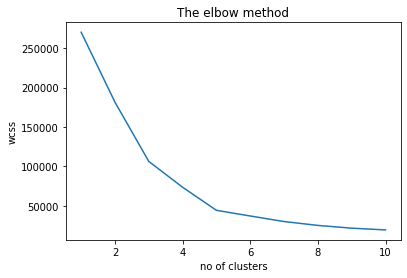

In [ ]:
from sklearn.cluster import KMeans
wcss = []                                                  # we form a list
for i in range(1,11):                                     # here in range we are considering clusters from 1 to 10
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)                # here kmeans++ is used to ignore the random initialisation trap i cluster forming
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)                                     # here innertia attribute is used to get wcss values directly(it calculates it)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')                                         # wcss = within cluster sum of sqaures
plt.show()


# here from elbow method,optimum number of clusters we require are = 5

## Training the K-Means model on the dataset

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)                                            # here fit_predict method not only train kmeans model on features but also is used to return the dependent variable which we are building

In [ ]:
print(y_kmeans)                                       # we predict here the labels in terms of clusters to which given dataset belongs


# here, 1st customer belongs to 4th clusters(3 index = 4, as start from 0)
# 2nd customer belongs to 1st clusters,like these, and so on...

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

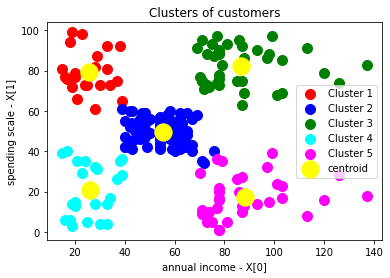

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'yellow',label = 'centroid')
plt.title('Clusters of customers')
plt.xlabel('annual income - X[0]')
plt.ylabel('spending scale - X[1]')
plt.legend()
plt.show()
